In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
nMTCD=50000

ACB_optimal_data = pd.read_csv(f'../data/ACB_optimal/ACB_optimal_MTCD_RA_Time_{nMTCD}.csv')

D2D_Basic = pd.read_csv(f'../data/D2D_Basic/D2D_basic_Device_Result_{nMTCD}.csv')
D2D_Basic_D2D = pd.read_csv(f'../data/D2D_Basic/D2D_basic_D2D_Result_{nMTCD}.csv')
D2D_Basic_RA = pd.read_csv(f'../data/D2D_Basic/D2D_basic_RA_Result_{nMTCD}.csv')

D2D_Arranged = pd.read_csv(f'../data/D2D_Arranged/D2D_Arranged_Device_Result_{nMTCD}.csv')
D2D_Arranged_D2D = pd.read_csv(f'../data/D2D_Arranged/D2D_Arranged_D2D_Result_{nMTCD}.csv')
D2D_Arranged_RA = pd.read_csv(f'../data/D2D_Arranged/D2D_Arranged_RA_Result_{nMTCD}.csv')

# TDCR_Arranged = pd.read_csv(f'../data/TDCR_with_Arranged/TDCR_with_Arranged_Device_Result_{nMTCD}.csv')
# TDCR_Arranged_D2D = pd.read_csv(f'../data/TDCR_with_Arranged/TDCR_with_Arranged_D2D_Result_{nMTCD}.csv')
# TDCR_Arranged_RA = pd.read_csv(f'../data/TDCR_with_Arranged/TDCR_with_Arranged_RA_Result_{nMTCD}.csv')

TDCR_only_20 = pd.read_csv(f'../data/TDCR_only_20/TDCR_only_20_Device_Result_{nMTCD}.csv')
TDCR_only_20_D2D = pd.read_csv(f'../data/TDCR_only_20/TDCR_only_20_D2D_Result_{nMTCD}.csv')
TDCR_only_20_RA = pd.read_csv(f'../data/TDCR_only_20/TDCR_only_20_RA_Result_{nMTCD}.csv')

TDCR_only_25 = pd.read_csv(f'../data/TDCR_only_25/TDCR_only_25_Device_Result_{nMTCD}.csv')
TDCR_only_25_D2D = pd.read_csv(f'../data/TDCR_only_25/TDCR_only_25_D2D_Result_{nMTCD}.csv')
TDCR_only_25_RA = pd.read_csv(f'../data/TDCR_only_25/TDCR_only_25_RA_Result_{nMTCD}.csv')

TDCR_only_30 = pd.read_csv(f'../data/TDCR_only_30/TDCR_only_30_Device_Result_{nMTCD}.csv')
TDCR_only_30_D2D = pd.read_csv(f'../data/TDCR_only_30/TDCR_only_30_D2D_Result_{nMTCD}.csv')
TDCR_only_30_RA = pd.read_csv(f'../data/TDCR_only_30/TDCR_only_30_RA_Result_{nMTCD}.csv')

In [20]:
dummy = pd.Series(np.zeros(3000), dtype=int)
TDCR_only_20_dummy = (TDCR_only_20_RA['success'] + dummy).fillna(0)
TDCR_only_25_dummy = (TDCR_only_25_RA['success'] + dummy).fillna(0)
TDCR_only_30_dummy = (TDCR_only_30_RA['success'] + dummy).fillna(0)

D2D_Arranged_dummy = (D2D_Arranged_RA['success'] + dummy).fillna(0)
# TDCR_Arranged_dummy = (TDCR_Arranged_RA['success'] + dummy).fillna(0)

D2D_Basic_dummy = (D2D_Basic_RA['success'] + dummy).fillna(0)
ACB_optimal_dummy = (ACB_optimal_data.groupby('RA_success').size() + dummy).fillna(0)


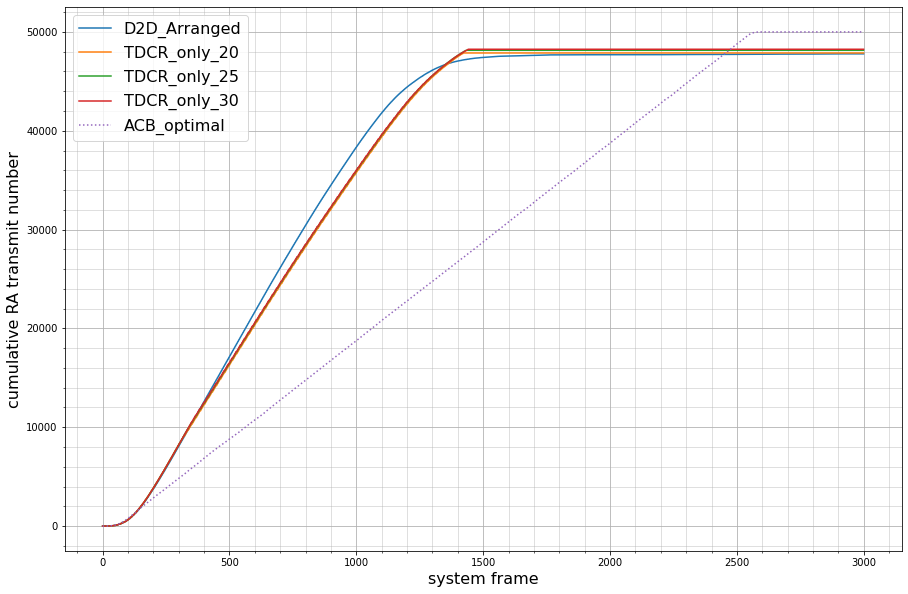

In [39]:
plt.figure(figsize=(15,10))
# plt.plot(np.cumsum(D2D_Basic_dummy), ':', label='D2D_Basic')
plt.plot(np.cumsum(D2D_Arranged_dummy), label='D2D_Arranged')

plt.plot(np.cumsum(TDCR_only_20_dummy), label='TDCR_only_20')
plt.plot(np.cumsum(TDCR_only_25_dummy), label='TDCR_only_25')
plt.plot(np.cumsum(TDCR_only_30_dummy), label='TDCR_only_30')

# plt.plot(np.cumsum(TDCR_Arranged_dummy), label='TDCR_Arranged')

plt.plot(np.cumsum(ACB_optimal_dummy), ':', label='ACB_optimal')

plt.grid(True, which='both')
plt.minorticks_on()
plt.grid(b=True, which='minor', linestyle='-', alpha=0.5)
plt.legend(fontsize=16)
plt.ylabel('cumulative RA transmit number', fontsize=16)
plt.xlabel('system frame', fontsize=16)
plt.savefig("compare_50k.svg")

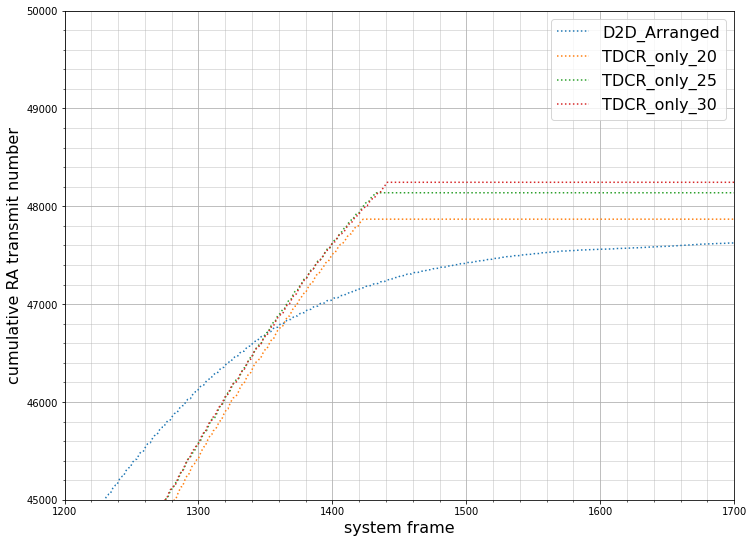

In [37]:
plt.figure(figsize=(12,9))
# plt.plot(np.cumsum(D2D_Basic_dummy), ':', label='D2D_Basic')
plt.plot(np.cumsum(D2D_Arranged_dummy), ':', label='D2D_Arranged')

plt.plot(np.cumsum(TDCR_only_20_dummy), ':', label='TDCR_only_20')
plt.plot(np.cumsum(TDCR_only_25_dummy), ':', label='TDCR_only_25')
plt.plot(np.cumsum(TDCR_only_30_dummy), ':', label='TDCR_only_30')

# plt.plot(np.cumsum(TDCR_Arranged_dummy), ':', label='TDCR_Arranged')
plt.xlim(1200, 1700)
plt.ylim(45000, 50000)

plt.grid(True, which='both')
plt.minorticks_on()
plt.grid(b=True, which='minor', linestyle='-', alpha=0.5)
plt.legend(fontsize=16)
plt.ylabel('cumulative RA transmit number', fontsize=16)
plt.xlabel('system frame', fontsize=16)
plt.savefig("compare_detail_50k.svg")

In [40]:
print(f'TDCR_only_20: {TDCR_only_20_RA.index[-1]}, {np.cumsum(TDCR_only_20_dummy).max()}')
print(f'TDCR_only_25: {TDCR_only_25_RA.index[-1]}, {np.cumsum(TDCR_only_25_dummy).max()}')
print(f'TDCR_only_30: {TDCR_only_30_RA.index[-1]}, {np.cumsum(TDCR_only_30_dummy).max()}')

print(f'D2D_Arranged: {D2D_Arranged_RA.index[-1]}, {np.cumsum(D2D_Arranged_dummy).max()}')

print(f'TDCR_Arranged: {TDCR_Arranged_RA.index[-1]}, {np.cumsum(TDCR_Arranged_dummy).max()}')

TDCR_only_20: 1423, 47868.0
TDCR_only_25: 1433, 48138.0
TDCR_only_30: 1441, 48245.0
D2D_Arranged: 2999, 47780
TDCR_Arranged: 1088, 29842.0


In [41]:
print(TDCR_only_20_RA.groupby('TDCR').size())
print(TDCR_only_25_RA.groupby('TDCR').size())
print(TDCR_only_30_RA.groupby('TDCR').size())
print(TDCR_Arranged_RA.groupby('TDCR').size())

TDCR
H     138
M       2
N    1284
dtype: int64
TDCR
H     136
M       2
N    1296
dtype: int64
TDCR
H     136
M       3
N    1303
dtype: int64
TDCR
H      26
M      20
N    1043
dtype: int64


In [42]:
print('TDCR 20 maximum D2D transmit: ', TDCR_only_20['D2D_transmit'].max())
print('TDCR 20 average D2D transmit: ', TDCR_only_20['D2D_transmit'].mean())

print('TDCR 25 maximum D2D transmit: ', TDCR_only_25['D2D_transmit'].max())
print('TDCR 25 average D2D transmit: ', TDCR_only_25['D2D_transmit'].mean())

print('TDCR 30 maximum D2D transmit: ', TDCR_only_30['D2D_transmit'].max())
print('TDCR 30 average D2D transmit: ', TDCR_only_30['D2D_transmit'].mean())

print('D2D Arrange maximum D2D transmit: ', D2D_Arranged['D2D_transmit'].max())
print('D2D Arrange average D2D transmit: ', D2D_Arranged['D2D_transmit'].mean())


print('TDCR Arrange maximum D2D transmit: ', TDCR_Arranged['D2D_transmit'].max())
print('TDCR Arrange average D2D transmit: ', TDCR_Arranged['D2D_transmit'].mean())

TDCR 20 maximum D2D transmit:  6
TDCR 20 average D2D transmit:  1.15096
TDCR 25 maximum D2D transmit:  7
TDCR 25 average D2D transmit:  1.15414
TDCR 30 maximum D2D transmit:  7
TDCR 30 average D2D transmit:  1.1553
D2D Arrange maximum D2D transmit:  355
D2D Arrange average D2D transmit:  21.20306
TDCR Arrange maximum D2D transmit:  100
TDCR Arrange average D2D transmit:  2.236466666666667


In [43]:
TDCR_only_20_RA_success = TDCR_only_20.loc[TDCR_only_20['RA_success'] != -1]
TDCR_only_25_RA_success = TDCR_only_25.loc[TDCR_only_25['RA_success'] != -1]
TDCR_only_30_RA_success = TDCR_only_30.loc[TDCR_only_30['RA_success'] != -1]
D2D_Arranged_RA_success = D2D_Arranged.loc[D2D_Arranged['RA_success'] != -1]
TDCR_Arranged_RA_success = TDCR_Arranged.loc[TDCR_Arranged['RA_success'] != -1]
print('TDCR_20_avg_delay: ', np.average(TDCR_only_20_RA_success['RA_success'] - TDCR_only_20_RA_success['RA_init']))
print('TDCR_25_avg_delay: ', np.average(TDCR_only_25_RA_success['RA_success'] - TDCR_only_25_RA_success['RA_init']))
print('TDCR_30_avg_delay: ', np.average(TDCR_only_30_RA_success['RA_success'] - TDCR_only_30_RA_success['RA_init']))
print('D2D_Arranged_avg_delay: ', np.average(D2D_Arranged_RA_success['RA_success'] - D2D_Arranged_RA_success['RA_init']))
print('TDCR_Arranged_delay: ', np.average(TDCR_Arranged_RA_success['RA_success'] - TDCR_Arranged_RA_success['RA_init']))

TDCR_20_avg_delay:  277.6560750396925
TDCR_25_avg_delay:  277.8801778220948
TDCR_30_avg_delay:  278.228894185926
D2D_Arranged_avg_delay:  248.06906655504395
TDCR_Arranged_delay:  93.5307620132699


In [44]:
TDCR_only_20_D2D_success = TDCR_only_20.loc[TDCR_only_20['D2D_success'] != -1]
TDCR_only_25_D2D_success = TDCR_only_25.loc[TDCR_only_25['D2D_success'] != -1]
TDCR_only_30_D2D_success = TDCR_only_30.loc[TDCR_only_30['D2D_success'] != -1]
D2D_Arranged_D2D_success = D2D_Arranged.loc[D2D_Arranged['D2D_success'] != -1]
TDCR_Arranged_20_D2D_success = TDCR_Arranged.loc[TDCR_Arranged['D2D_success'] != -1]
print('TDCR_20_avg_delay: ', np.average(TDCR_only_20_RA_success['D2D_success'] - TDCR_only_20_RA_success['RA_init']))
print('TDCR_25_avg_delay: ', np.average(TDCR_only_25_RA_success['D2D_success'] - TDCR_only_25_RA_success['RA_init']))
print('TDCR_30_avg_delay: ', np.average(TDCR_only_30_RA_success['D2D_success'] - TDCR_only_30_RA_success['RA_init']))
print('D2D_Arranged_avg_delay: ', np.average(D2D_Arranged_RA_success['D2D_success'] - D2D_Arranged_RA_success['RA_init']))
print('TDCR_Arranged_delay: ', np.average(TDCR_Arranged_RA_success['D2D_success'] - TDCR_Arranged_RA_success['RA_init']))

TDCR_20_avg_delay:  2.6873067602573744
TDCR_25_avg_delay:  2.7181644438904815
TDCR_30_avg_delay:  2.729567830863302
D2D_Arranged_avg_delay:  53.661615738802844
TDCR_Arranged_delay:  7.851350445680584
